In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
#read the dataset
data = pd.read_csv("C:/Users/Raja/Downloads/netflix_titles.csv/netflix_titles.csv")

In [4]:
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [5]:
data.shape

(8807, 12)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [7]:
data.dtypes

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

In [8]:
col = [i for i in data.columns if data[i].dtypes == "O" and i not in ("show_id","title","cast","date_added","duration","description","director","country","listed_in")]
#seperate the columns what we have to convert to category

In [10]:
print(col) #those columns

['type', 'rating']


In [11]:
data[col] = data[col].astype("category") #changing data type

In [12]:
data.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."


In [13]:
data.dtypes

show_id           object
type            category
title             object
director          object
cast              object
country           object
date_added        object
release_year       int64
rating          category
duration          object
listed_in         object
description       object
dtype: object

In [14]:
#number of unique values in our dataset 
for i in data.columns:
    print(i," : ",data[i].nunique())

show_id  :  8807
type  :  2
title  :  8807
director  :  4528
cast  :  7692
country  :  748
date_added  :  1767
release_year  :  74
rating  :  17
duration  :  220
listed_in  :  514
description  :  8775


In [18]:
#checking value counts for director column
data["director"].value_counts()


director
Rajiv Chilaka                     19
Raúl Campos, Jan Suter            18
Marcus Raboy                      16
Suhas Kadav                       16
Jay Karas                         14
                                  ..
Raymie Muzquiz, Stu Livingston     1
Joe Menendez                       1
Eric Bross                         1
Will Eisenberg                     1
Mozez Singh                        1
Name: count, Length: 4528, dtype: int64

In [22]:
#checking value counts for rating column
data["rating"].value_counts()

rating
TV-MA       3207
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
UR             3
NC-17          3
74 min         1
84 min         1
66 min         1
Name: count, dtype: int64

In rating column mistakenly some minutes data are there it should be in duration so the data in ratings are irrelevant

In [19]:
data.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [20]:
data.dtypes

show_id           object
type            category
title             object
director          object
cast              object
country           object
date_added        object
release_year       int64
rating          category
duration          object
listed_in         object
description       object
dtype: object

In [21]:
#unnesting the director column
df1 = data["director"].apply(lambda x : str(x).split(", ")).tolist()
dfnew1 = pd.DataFrame(df1,index=data["title"])
dfnew1 = dfnew1.stack()
dfnew1 = pd.DataFrame(dfnew1)
dfnew1 = dfnew1.reset_index("title")
dfnew1 = dfnew1.rename(columns = {0:"director"})
dfnew1

,title,director
0,Dick Johnson Is Dead,Kirsten Johnson
0,Blood & Water,nan
0,Ganglands,Julien Leclercq
0,Jailbirds New Orleans,nan
0,Kota Factory,nan
...,...,...
0,Zodiac,David Fincher
0,Zombie Dumb,nan
0,Zombieland,Ruben Fleischer
0,Zoom,Peter Hewitt


In [22]:
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [23]:
#unnesting the cast column
df2  = data["cast"].apply(lambda x : str(x).split(", ")).tolist()
dfnew2 = pd.DataFrame(df2,index=data["title"])
dfnew2 = dfnew2.stack()
dfnew2 = pd.DataFrame(dfnew2)
dfnew2 = dfnew2.reset_index("title")
dfnew2 = dfnew2.rename(columns = {0:"cast"})
dfnew2

,title,cast
0,Dick Johnson Is Dead,nan
0,Blood & Water,Ama Qamata
1,Blood & Water,Khosi Ngema
2,Blood & Water,Gail Mabalane
3,Blood & Water,Thabang Molaba
...,...,...
3,Zubaan,Manish Chaudhary
4,Zubaan,Meghna Malik
5,Zubaan,Malkeet Rauni
6,Zubaan,Anita Shabdish


In [24]:
#unnesting the country column
df3  = data["country"].apply(lambda x : str(x).split(", ")).tolist()
dfnew3 = pd.DataFrame(df3,index=data["title"])
dfnew3 = dfnew3.stack()
dfnew3 = pd.DataFrame(dfnew3)
dfnew3 = dfnew3.reset_index("title")
dfnew3 = dfnew3.rename(columns = {0:"country"})
dfnew3

,title,country
0,Dick Johnson Is Dead,United States
0,Blood & Water,South Africa
0,Ganglands,nan
0,Jailbirds New Orleans,nan
0,Kota Factory,India
...,...,...
0,Zodiac,United States
0,Zombie Dumb,nan
0,Zombieland,United States
0,Zoom,United States


In [25]:
#unnesting the listedin column
df4  = data["listed_in"].apply(lambda x : str(x).split(", ")).tolist()
dfnew4 = pd.DataFrame(df4,index=data["title"])
dfnew4 = dfnew4.stack()
dfnew4 = pd.DataFrame(dfnew4)
dfnew4 = dfnew4.reset_index("title")
dfnew4 = dfnew4.rename(columns = {0:"listed_in"})
dfnew4

,title,listed_in
0,Dick Johnson Is Dead,Documentaries
0,Blood & Water,International TV Shows
1,Blood & Water,TV Dramas
2,Blood & Water,TV Mysteries
0,Ganglands,Crime TV Shows
...,...,...
0,Zoom,Children & Family Movies
1,Zoom,Comedies
0,Zubaan,Dramas
1,Zubaan,International Movies


In [26]:
#merging unnested director column to unnested actor column
dfnew5 = dfnew1.merge(dfnew2,on = "title", how = "inner")
#merging above dataset to unnested country column
dfnew6 = dfnew5.merge(dfnew3,on = "title", how = "inner")
#merging above dataset to unnested genre column
new_df = dfnew6.merge(dfnew4,on = "title", how = "inner")
#replacing nan values
new_df["director"].replace(["nan"],["unknown director"],inplace=True)
new_df["cast"].replace(["nan"],["unknown actor"],inplace=True)
new_df["country"].replace(["nan"],[np.nan],inplace=True)
new_df

,title,director,cast,country,listed_in
0,Dick Johnson Is Dead,Kirsten Johnson,unknown actor,United States,Documentaries
1,Blood & Water,unknown director,Ama Qamata,South Africa,International TV Shows
2,Blood & Water,unknown director,Ama Qamata,South Africa,TV Dramas
3,Blood & Water,unknown director,Ama Qamata,South Africa,TV Mysteries
4,Blood & Water,unknown director,Khosi Ngema,South Africa,International TV Shows
...,...,...,...,...,...
201986,Zubaan,Mozez Singh,Anita Shabdish,India,International Movies
201987,Zubaan,Mozez Singh,Anita Shabdish,India,Music & Musicals
201988,Zubaan,Mozez Singh,Chittaranjan Tripathy,India,Dramas
201989,Zubaan,Mozez Singh,Chittaranjan Tripathy,India,International Movies


In [27]:
df = data[["show_id","type","title","date_added","release_year","rating","duration","description"]]

In [31]:
df_final = new_df.merge(df,on="title",how="inner")

In [32]:
df_final

,title,director,cast,country,listed_in,show_id,type,date_added,release_year,rating,duration,description
0,Dick Johnson Is Dead,Kirsten Johnson,unknown actor,United States,Documentaries,s1,Movie,"September 25, 2021",2020,PG-13,90 min,"As her father nears the end of his life, filmm..."
1,Blood & Water,unknown director,Ama Qamata,South Africa,International TV Shows,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t..."
2,Blood & Water,unknown director,Ama Qamata,South Africa,TV Dramas,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t..."
3,Blood & Water,unknown director,Ama Qamata,South Africa,TV Mysteries,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t..."
4,Blood & Water,unknown director,Khosi Ngema,South Africa,International TV Shows,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t..."
...,...,...,...,...,...,...,...,...,...,...,...,...
201986,Zubaan,Mozez Singh,Anita Shabdish,India,International Movies,s8807,Movie,"March 2, 2019",2015,TV-14,111 min,A scrappy but poor boy worms his way into a ty...
201987,Zubaan,Mozez Singh,Anita Shabdish,India,Music & Musicals,s8807,Movie,"March 2, 2019",2015,TV-14,111 min,A scrappy but poor boy worms his way into a ty...
201988,Zubaan,Mozez Singh,Chittaranjan Tripathy,India,Dramas,s8807,Movie,"March 2, 2019",2015,TV-14,111 min,A scrappy but poor boy worms his way into a ty...
201989,Zubaan,Mozez Singh,Chittaranjan Tripathy,India,International Movies,s8807,Movie,"March 2, 2019",2015,TV-14,111 min,A scrappy but poor boy worms his way into a ty...


finally we unnested the data and merged into original dataframe

In [33]:
#now checking null values
df_final.isnull().sum()

title               0
director            0
cast                0
country         11897
listed_in           0
show_id             0
type                0
date_added        158
release_year        0
rating             67
duration            3
description         0
dtype: int64

some columns has missing value we have to  those handle columns director,cast,country,date_added,duration

In [34]:
data.isnull().sum()/len(data)*100

show_id          0.000000
type             0.000000
title            0.000000
director        29.908028
cast             9.367549
country          9.435676
date_added       0.113546
release_year     0.000000
rating           0.045418
duration         0.034064
listed_in        0.000000
description      0.000000
dtype: float64

missing values percentage regarding to that particular columns

In [36]:
df_final["rating"].value_counts()

rating
TV-MA       73867
TV-14       43931
R           25860
PG-13       16246
TV-PG       14926
PG          10919
TV-Y7        6304
TV-Y         3665
TV-G         2779
NR           1573
G            1530
NC-17         149
TV-Y7-FV       86
UR             86
74 min          1
84 min          1
66 min          1
Name: count, dtype: int64

we can see here in rating column mistakenly entered duration column values

In [35]:
#IMPUTING NULL VALUES FOR DURATION COLUMN
df_final.loc[df_final["duration"].isnull(),"duration"] =  df_final.loc[df_final["duration"].isnull(),"duration"].fillna(df_final["rating"])
df_final.isnull().sum()

title               0
director            0
cast                0
country         11897
listed_in           0
show_id             0
type                0
date_added        158
release_year        0
rating             67
duration            0
description         0
dtype: int64

In [37]:
#IMPUTING NULL VALUES FOR RATING COLUMN
df_final.loc[df_final["rating"].str.contains("min",na=False),'rating'] = "NR"
df_final["rating"].fillna("NR",inplace = True)
df_final.isnull().sum()

title               0
director            0
cast                0
country         11897
listed_in           0
show_id             0
type                0
date_added          0
release_year        0
rating              0
duration            0
description         0
dtype: int64

In [36]:
#DATE_ADDED COLUMN HAS SOME MISSING Values 
#here we impute with the closest possible value
for i in df_final[df_final["date_added"].isnull()]["release_year"].unique():
    imp = df_final[df_final["release_year"]==i]["date_added"].mode()[0]
    df_final.loc[df_final["release_year"]==i,"date_added"] = df_final.loc[df_final["release_year"]==i,"date_added"].fillna(imp)
    

In [40]:
df_final[~df_final["country"].isnull()]["director"].unique()

array(['Kirsten Johnson', 'unknown director', 'Haile Gerima', ...,
       'Majid Al Ansari', 'Peter Hewitt', 'Mozez Singh'], dtype=object)

In [41]:
df_final.columns

Index(['title', 'director', 'cast', 'country', 'listed_in', 'show_id', 'type',
       'date_added', 'release_year', 'rating', 'duration', 'description'],
      dtype='object')

In [38]:
for i in df_final[df_final["country"].isnull()]["director"].unique():
    if i in df_final[~df_final["country"].isnull()]["director"].unique():
        imp = df_final[df_final["director"]==i]["country"].mode().values[0]
        df_final.loc[df_final["director"]==i,'country'] = df_final.loc[df_final["director"]==i,'country'].fillna(imp)

In [39]:
for i in df_final[df_final["country"].isnull()]["cast"].unique():
    if i in df_final[~df_final["country"].isnull()]["cast"].unique():
        imp = df_final[df_final["cast"]==i]["country"].mode().values[0]
        df_final.loc[df_final["cast"]==i,'country'] = df_final.loc[df_final["cast"]==i,'country'].fillna(imp)
    

In [40]:
df_final["country"] = df_final["country"].fillna("unknown country")

In [41]:
df_final["duration"] = df_final["duration"].str.replace("min","")

In [42]:
df_final["duration_new"] = df_final["duration"].copy()
df_final1 = df_final.copy()

In [43]:
df_final1.head()

,title,director,cast,country,listed_in,show_id,type,date_added,release_year,rating,duration,description,duration_new
0,Dick Johnson Is Dead,Kirsten Johnson,unknown actor,United States,Documentaries,s1,Movie,"September 25, 2021",2020,PG-13,90,"As her father nears the end of his life, filmm...",90
1,Blood & Water,unknown director,Ama Qamata,South Africa,International TV Shows,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",2 Seasons
2,Blood & Water,unknown director,Ama Qamata,South Africa,TV Dramas,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",2 Seasons
3,Blood & Water,unknown director,Ama Qamata,South Africa,TV Mysteries,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",2 Seasons
4,Blood & Water,unknown director,Khosi Ngema,South Africa,International TV Shows,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",2 Seasons


In [44]:
df_final1.loc[df_final1["duration_new"].str.contains("Season"),["duration_new"]] = 0
df_final1["duration_new"] = df_final1["duration_new"].astype("int")
df_final1.head()

,title,director,cast,country,listed_in,show_id,type,date_added,release_year,rating,duration,description,duration_new
0,Dick Johnson Is Dead,Kirsten Johnson,unknown actor,United States,Documentaries,s1,Movie,"September 25, 2021",2020,PG-13,90,"As her father nears the end of his life, filmm...",90
1,Blood & Water,unknown director,Ama Qamata,South Africa,International TV Shows,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",0
2,Blood & Water,unknown director,Ama Qamata,South Africa,TV Dramas,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",0
3,Blood & Water,unknown director,Ama Qamata,South Africa,TV Mysteries,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",0
4,Blood & Water,unknown director,Khosi Ngema,South Africa,International TV Shows,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",0


In [45]:
df_final1["duration_new"].describe()

count    201991.000000
mean         77.152789
std          52.269154
min           0.000000
25%           0.000000
50%          95.000000
75%         112.000000
max         312.000000
Name: duration_new, dtype: float64

C:\Users\Raja\AppData\Local\Temp\ipykernel_7828\1212528613.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_final1["duration_new"],hist=True,kde=True)


<Axes: xlabel='duration_new', ylabel='Density'>

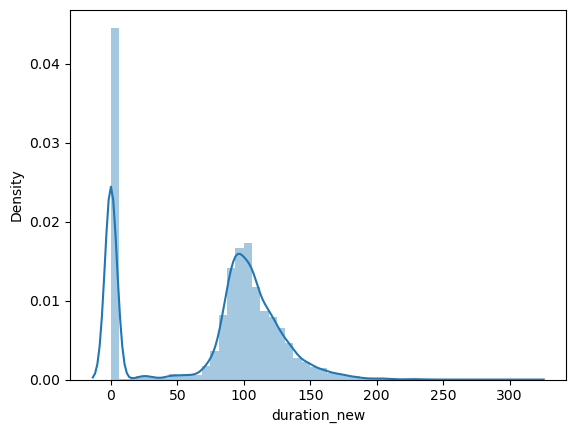

In [50]:
import seaborn as sns
sns.distplot(df_final1["duration_new"],hist=True,kde=True)

In [51]:
#creating bins using cut method
bins1 = [-1,1,50,80,100,120,150,200,315]
label1 = ['<1','1-50','50-80','80-100','100-120','120-150','150-200','200-315']
df_final1['duration_new'] = pd.cut(df_final1['duration_new'],bins=bins1,labels=label1)
df_final1.head()

,title,director,cast,country,listed_in,show_id,type,date_added,release_year,rating,duration,description,duration_new
0,Dick Johnson Is Dead,Kirsten Johnson,unknown actor,United States,Documentaries,s1,Movie,"September 25, 2021",2020,PG-13,90,"As her father nears the end of his life, filmm...",80-100
1,Blood & Water,unknown director,Ama Qamata,South Africa,International TV Shows,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",<1
2,Blood & Water,unknown director,Ama Qamata,South Africa,TV Dramas,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",<1
3,Blood & Water,unknown director,Ama Qamata,South Africa,TV Mysteries,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",<1
4,Blood & Water,unknown director,Khosi Ngema,South Africa,International TV Shows,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",<1


In [52]:
df_final1.loc[~df_final['duration'].str.contains('Season'),'duration'] = df_final1.loc[~df_final['duration'].str.contains('Season'),'duration_new']
df_final1.drop("duration_new",axis=1,inplace=True)
df_final1.head()

,title,director,cast,country,listed_in,show_id,type,date_added,release_year,rating,duration,description
0,Dick Johnson Is Dead,Kirsten Johnson,unknown actor,United States,Documentaries,s1,Movie,"September 25, 2021",2020,PG-13,80-100,"As her father nears the end of his life, filmm..."
1,Blood & Water,unknown director,Ama Qamata,South Africa,International TV Shows,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t..."
2,Blood & Water,unknown director,Ama Qamata,South Africa,TV Dramas,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t..."
3,Blood & Water,unknown director,Ama Qamata,South Africa,TV Mysteries,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t..."
4,Blood & Water,unknown director,Khosi Ngema,South Africa,International TV Shows,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t..."


In [53]:
df_final1['duration'].value_counts()

duration
80-100        52937
100-120       48724
1 Season      35035
120-150       26691
2 Seasons      9559
50-80          7700
150-200        6737
3 Seasons      5084
1-50           2530
4 Seasons      2134
5 Seasons      1698
7 Seasons       843
6 Seasons       633
200-315         524
8 Seasons       286
9 Seasons       257
10 Seasons      220
13 Seasons      132
12 Seasons      111
15 Seasons       96
17 Seasons       30
11 Seasons       30
Name: count, dtype: int64

In [54]:
df_final1.rename(columns={'listed_in':'genre'},inplace=True)

In [55]:
df_final1.head(3)

,title,director,cast,country,genre,show_id,type,date_added,release_year,rating,duration,description
0,Dick Johnson Is Dead,Kirsten Johnson,unknown actor,United States,Documentaries,s1,Movie,"September 25, 2021",2020,PG-13,80-100,"As her father nears the end of his life, filmm..."
1,Blood & Water,unknown director,Ama Qamata,South Africa,International TV Shows,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t..."
2,Blood & Water,unknown director,Ama Qamata,South Africa,TV Dramas,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t..."


In [56]:
#number of distinct title on the basis of genre
df_final1.groupby(["genre"]).agg({'title':'nunique'})

,title
genre,
Action & Adventure,859
Anime Features,71
Anime Series,176
British TV Shows,253
Children & Family Movies,641
Classic & Cult TV,28
Classic Movies,116
Comedies,1674
Crime TV Shows,470


In [57]:
df_genre = df_final1.groupby(["genre"]).agg({'title':'nunique'}).reset_index().sort_values(by=['title'],ascending=False)[:15]

In [58]:
df_genre

,genre,title
16,International Movies,2752
12,Dramas,2427
7,Comedies,1674
17,International TV Shows,1351
10,Documentaries,869
0,Action & Adventure,859
34,TV Dramas,763
15,Independent Movies,756
4,Children & Family Movies,641
24,Romantic Movies,616


In [59]:
df_genre[::-1]['title']

11     395
18     451
8      470
41     577
33     581
24     616
4      641
15     756
34     763
0      859
10     869
17    1351
7     1674
12    2427
16    2752
Name: title, dtype: int64

# Bivariate Analysis

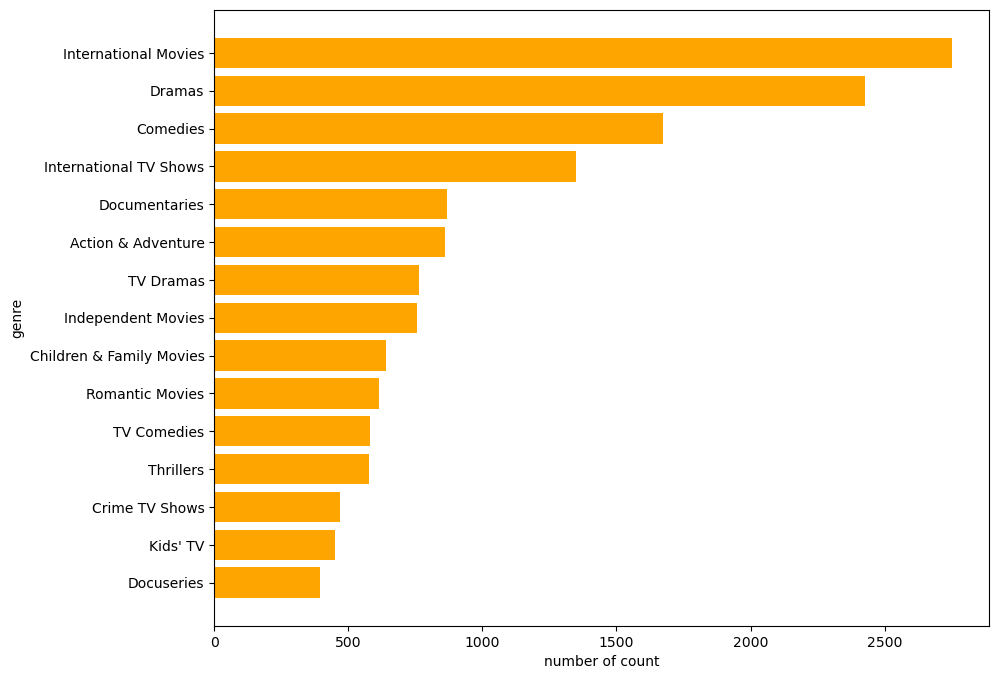

In [60]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
plt.barh(df_genre['genre'][::-1],df_genre['title'][::-1],color='orange')
plt.xlabel('number of count')
plt.ylabel("genre")
plt.show()

International movies,dramas and comedies are the most popular

In [61]:
df_final1.head()

,title,director,cast,country,genre,show_id,type,date_added,release_year,rating,duration,description
0,Dick Johnson Is Dead,Kirsten Johnson,unknown actor,United States,Documentaries,s1,Movie,"September 25, 2021",2020,PG-13,80-100,"As her father nears the end of his life, filmm..."
1,Blood & Water,unknown director,Ama Qamata,South Africa,International TV Shows,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t..."
2,Blood & Water,unknown director,Ama Qamata,South Africa,TV Dramas,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t..."
3,Blood & Water,unknown director,Ama Qamata,South Africa,TV Mysteries,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t..."
4,Blood & Water,unknown director,Khosi Ngema,South Africa,International TV Shows,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t..."


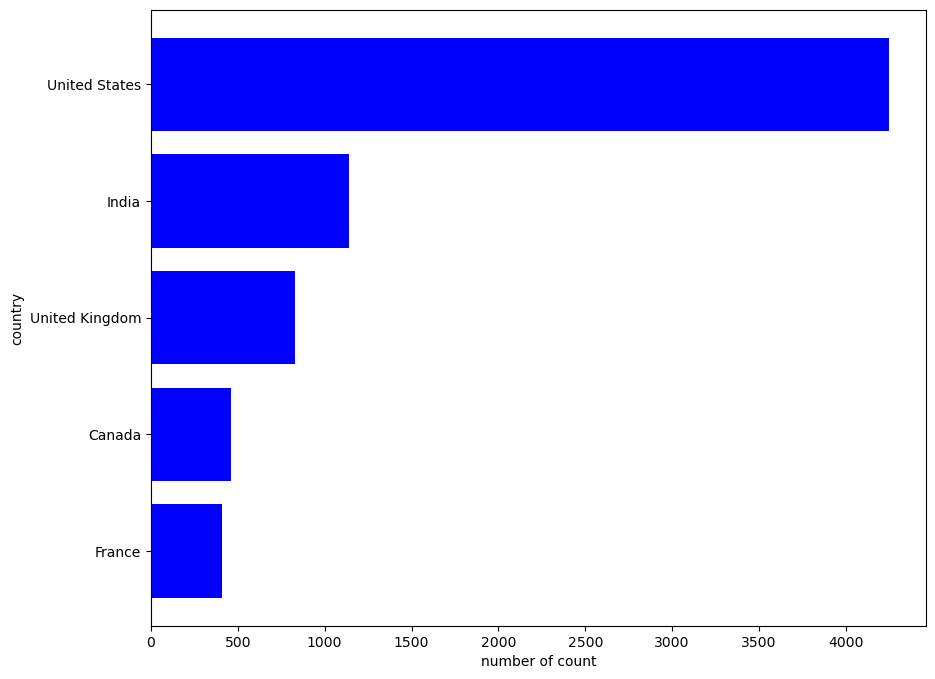

In [62]:
df_country = df_final1.groupby(["country"]).agg({'title':'nunique'}).reset_index().sort_values(by=['title'],ascending=False)[:5]
plt.figure(figsize=(10,8))
plt.barh(df_country['country'][::-1],df_country['title'][::-1],color='blue')
plt.xlabel('number of count')
plt.ylabel("country")
plt.show()

united states,india,united kingdom are the top 3 countries

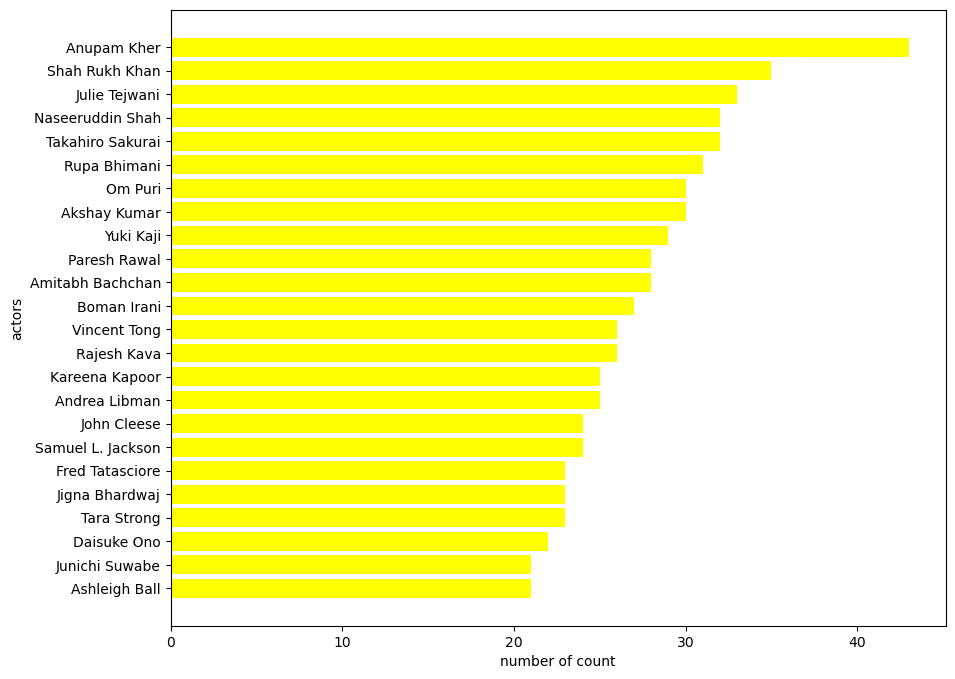

In [47]:
df_cast = df_final1.groupby(["cast"]).agg({'title':'nunique'}).reset_index().sort_values(by=['title'],ascending=False)[:25]
df_cast = df_cast.loc[df_cast['cast']!='unknown actor']
plt.figure(figsize=(10,8))
plt.barh(df_cast['cast'][::-1],df_cast['title'][::-1],color='yellow')
plt.xlabel('number of count')
plt.ylabel("actors")
plt.show()

Top 25 actors with number of count they acted in movies

In [48]:
df_final1['rating'] = df_final1['rating'].astype('object')

In [49]:
df_final1.loc[df_final1['rating'].str.contains('min'),'rating'] = 'NA'

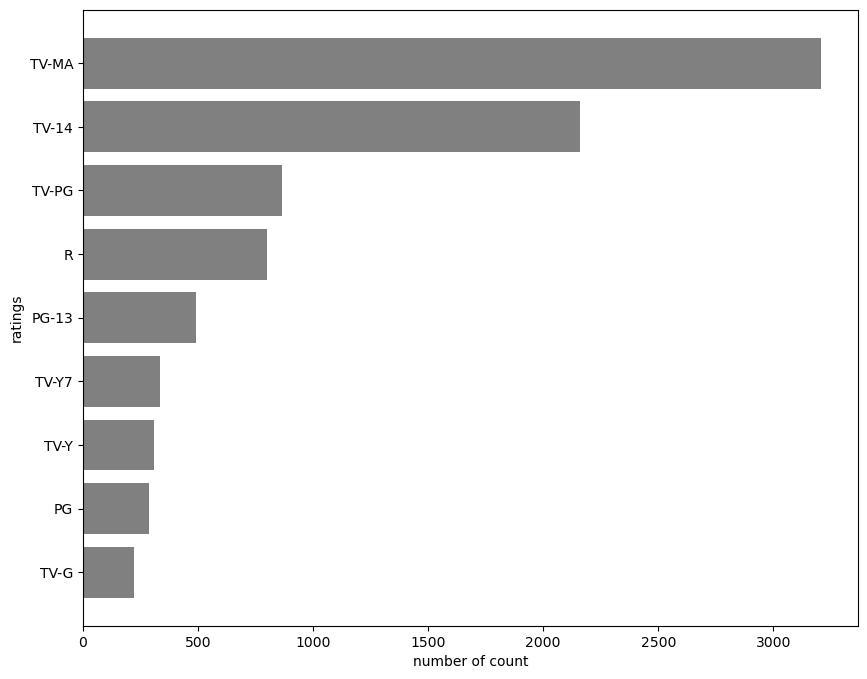

In [50]:
df_rating = df_final1.groupby(["rating"]).agg({'title':'nunique'}).reset_index().sort_values(by=['title'],ascending=False)[:10]
df_rating = df_rating.loc[df_rating['rating']!='NR']
plt.figure(figsize=(10,8))
plt.barh(df_rating['rating'][::-1],df_rating['title'][::-1],color='grey')
plt.xlabel('number of count')
plt.ylabel("ratings")
plt.show()

Top 10 ratings basis of title count

In [67]:
df_final1.head(3)

,title,director,cast,country,genre,show_id,type,date_added,release_year,rating,duration,description
0,Dick Johnson Is Dead,Kirsten Johnson,unknown actor,United States,Documentaries,s1,Movie,"September 25, 2021",2020,PG-13,80-100,"As her father nears the end of his life, filmm..."
1,Blood & Water,unknown director,Ama Qamata,South Africa,International TV Shows,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t..."
2,Blood & Water,unknown director,Ama Qamata,South Africa,TV Dramas,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t..."


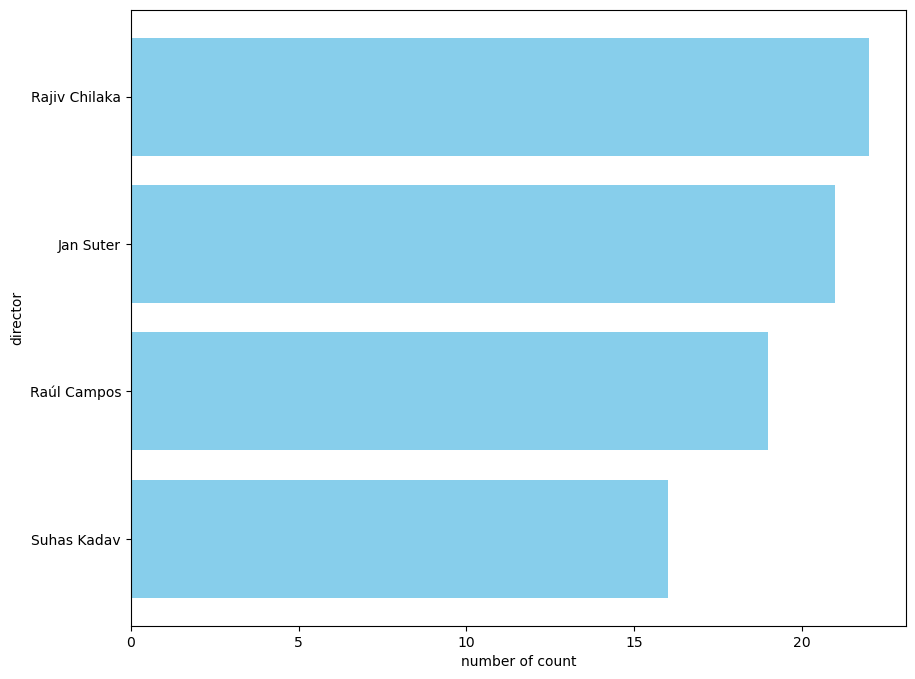

In [51]:
df_directors = df_final1.groupby(["director"]).agg({'title':'nunique'}).reset_index().sort_values(by=['title'],ascending=False)[:5]
df_directors = df_directors.loc[df_directors['director']!='unknown director']
plt.figure(figsize=(10,8))
plt.barh(df_directors['director'][::-1],df_directors['title'][::-1],color='skyblue')
plt.xlabel('number of count')
plt.ylabel("director")
plt.show()

Top 5 directors movies count basis

In [69]:
df_final1.head(3)

,title,director,cast,country,genre,show_id,type,date_added,release_year,rating,duration,description
0,Dick Johnson Is Dead,Kirsten Johnson,unknown actor,United States,Documentaries,s1,Movie,"September 25, 2021",2020,PG-13,80-100,"As her father nears the end of his life, filmm..."
1,Blood & Water,unknown director,Ama Qamata,South Africa,International TV Shows,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t..."
2,Blood & Water,unknown director,Ama Qamata,South Africa,TV Dramas,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t..."


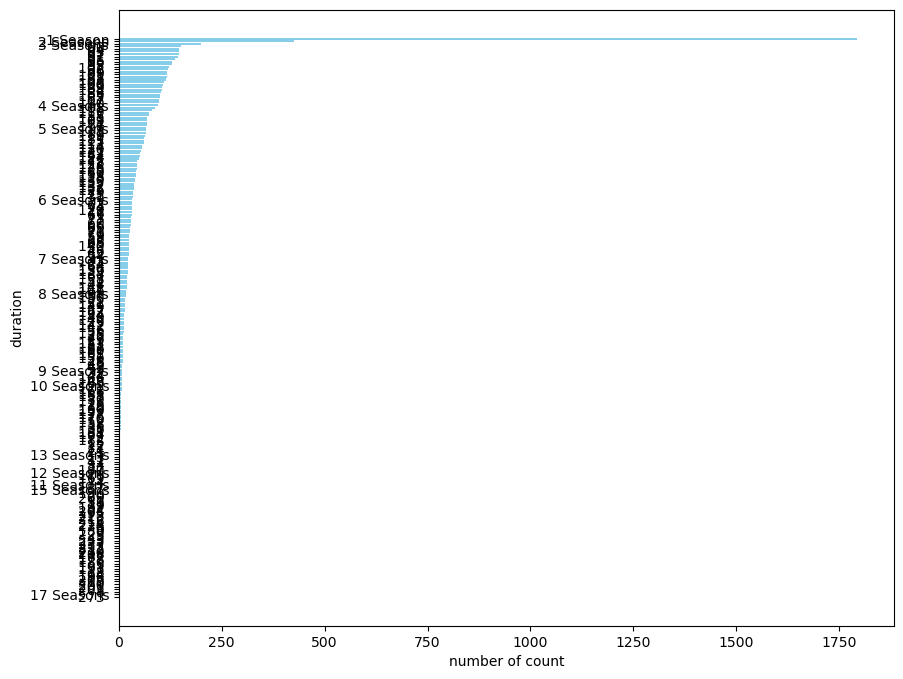

In [54]:
df_duration = df_final1.groupby(["duration"]).agg({'title':'nunique'}).reset_index().sort_values(by=['title'],ascending=False)[:]
#df_directors = df_directors.loc[df_directors['director']!='unknown director']
plt.figure(figsize=(10,8))
plt.barh(df_duration['duration'][::-1],df_duration['title'][::-1],color='skyblue')
plt.xlabel('number of count')
plt.ylabel("duration")
plt.show()

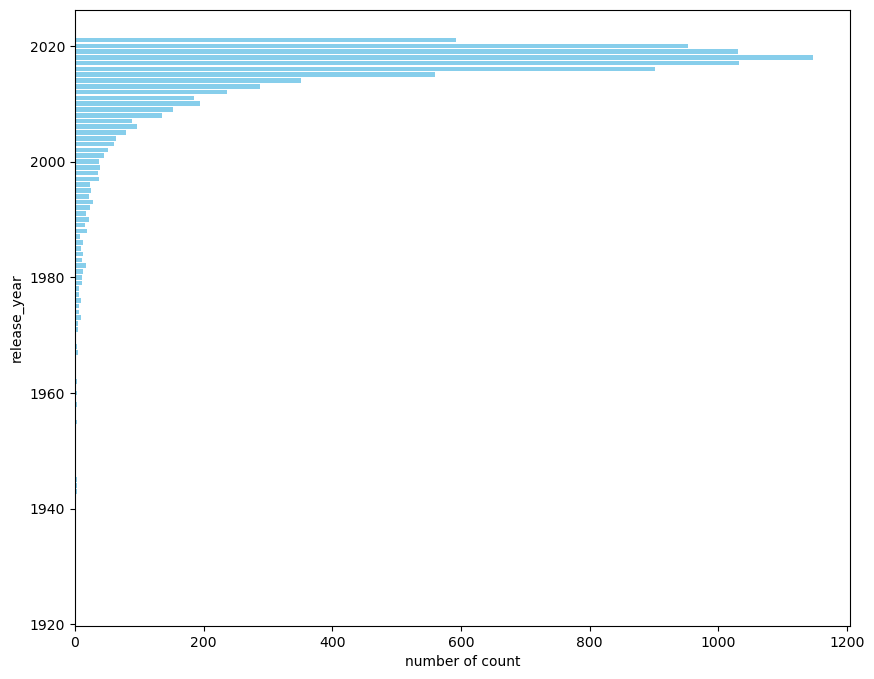

In [55]:
df_release_year = df_final1.groupby(["release_year"]).agg({'title':'nunique'}).reset_index().sort_values(by=['title'],ascending=False)[:]
#df_directors = df_directors.loc[df_directors['director']!='unknown director']
plt.figure(figsize=(10,8))
plt.barh(df_release_year['release_year'][::-1],df_release_year['title'][::-1],color='skyblue')
plt.xlabel('number of count')
plt.ylabel("release_year")
plt.show()

After 2005 only showid count increased 

In [57]:
df_final1.columns

Index(['title', 'director', 'cast', 'country', 'listed_in', 'show_id', 'type',
       'date_added', 'release_year', 'rating', 'duration', 'description',
       'duration_new'],
      dtype='object')

In [58]:
df_type = df_final1.groupby(["type"]).agg({'title':'nunique'}).reset_index().sort_values(by=['title'],ascending=False)


In [59]:
df_type

,type,title
0,Movie,6131
1,TV Show,2676


compare with tvshow movies count is 3 times larger than tv show count.

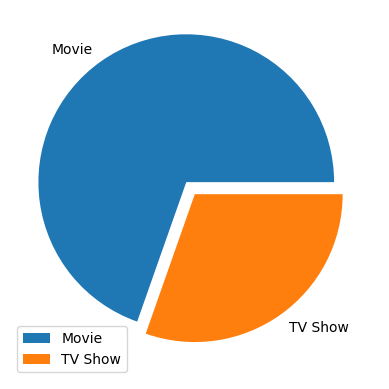

In [60]:
plt.pie(df_type['title'],labels=df_type["type"],explode=[0.1,0])
plt.legend()
plt.show()

distriution of movies and tv shows

# Univariate Analysis

In [61]:
df_final1.head()

,title,director,cast,country,listed_in,show_id,type,date_added,release_year,rating,duration,description,duration_new
0,Dick Johnson Is Dead,Kirsten Johnson,unknown actor,United States,Documentaries,s1,Movie,"September 25, 2021",2020,PG-13,90,"As her father nears the end of his life, filmm...",90
1,Blood & Water,unknown director,Ama Qamata,South Africa,International TV Shows,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",0
2,Blood & Water,unknown director,Ama Qamata,South Africa,TV Dramas,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",0
3,Blood & Water,unknown director,Ama Qamata,South Africa,TV Mysteries,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",0
4,Blood & Water,unknown director,Khosi Ngema,South Africa,International TV Shows,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",0


In [62]:
df_final1.groupby(['director','type']).agg({'title':'nunique'}).sort_values(by=['title'],ascending=False)

title
director         type          
unknown director TV Show   2446
                 Movie      188
Rajiv Chilaka    Movie       22
Jan Suter        Movie       21
Raúl Campos      Movie       19
...                         ...
Kazuchika Kise   TV Show      0
Kazuaki Kiriya   TV Show      0
Kayoze Irani     TV Show      0
Kayode Kasum     TV Show      0
Şenol Sönmez     TV Show      0

[9988 rows x 1 columns]

In [63]:
df_contype = df_final1.groupby(['country','type']).agg({'title':'nunique'}).reset_index().sort_values(by=['title'],ascending=False)

In [64]:
df_contype

,country,type,title
238,United States,Movie,2940
239,United States,TV Show,1308
94,India,Movie,1052
234,United Kingdom,Movie,556
44,Canada,Movie,334
...,...,...,...
31,Botswana,TV Show,0
141,Mongolia,TV Show,0
195,Serbia,TV Show,0
143,Montenegro,TV Show,0


In [66]:
#Top 5 MOvies count country wise
df_contype_movie = df_contype.loc[df_contype['type']=='Movie',:].head(10)

In [67]:
#Top 5 tv shows count country wise
df_contype_Tvshows = df_contype.loc[df_contype['type']=='TV Show',:].head(10)

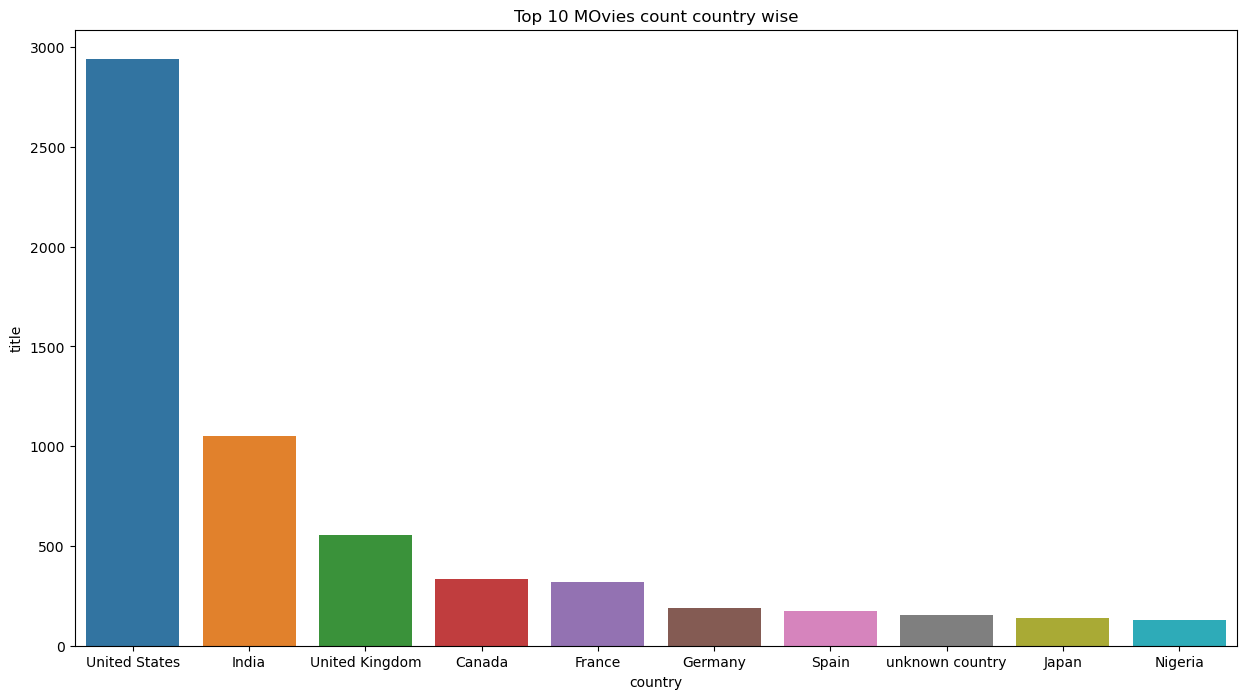

In [68]:
plt.figure(figsize=(15,8))
plt.title("Top 10 MOvies count country wise")
sns.barplot(x='country',y="title",data=df_contype_movie)
plt.show()

United states,Inida and united kingdom are the top countries has movies count.

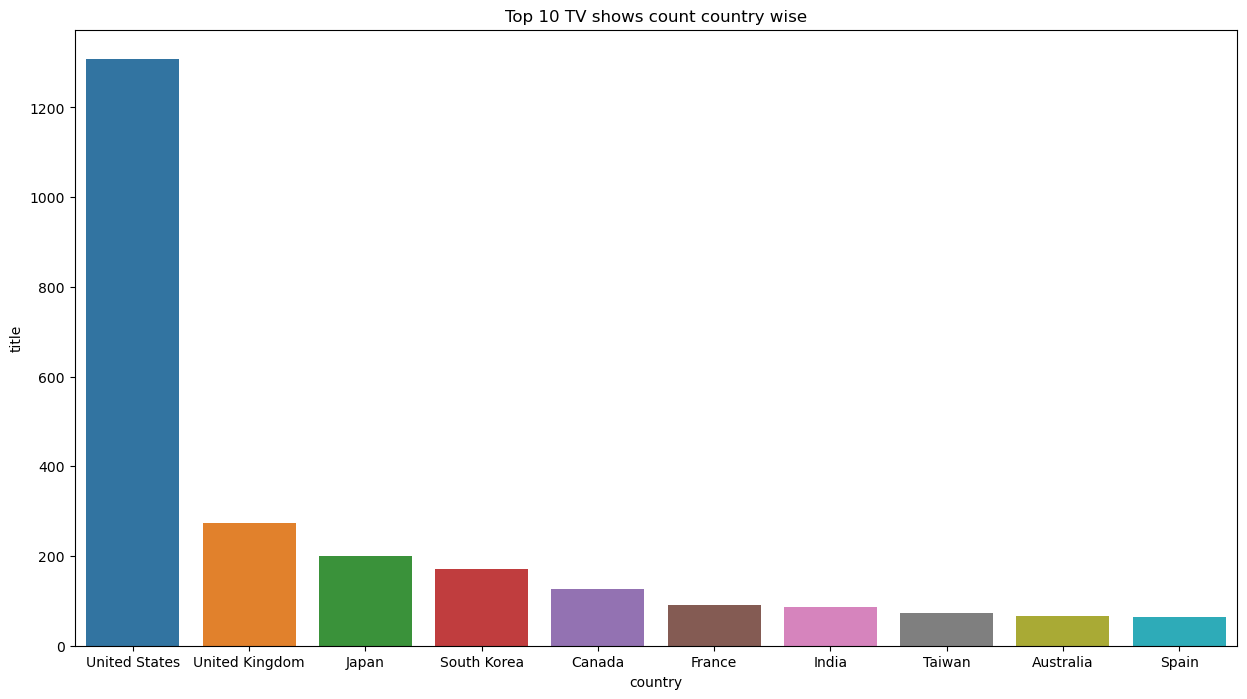

In [69]:
plt.figure(figsize=(15,8))
plt.title("Top 10 TV shows count country wise")
sns.barplot(x='country',y="title",data=df_contype_Tvshows)
plt.show()

united states,united kingdom and japan are the top countries has tv show count.india is in 7th position in the table 
we can see that indian give less priorities to tv shows compare with movies because india has second position based on movies

In [70]:
df_retype = df_final1.groupby(['release_year','type']).agg({'title':'nunique'}).reset_index().sort_values(by=['release_year'],ascending=False)[:41]

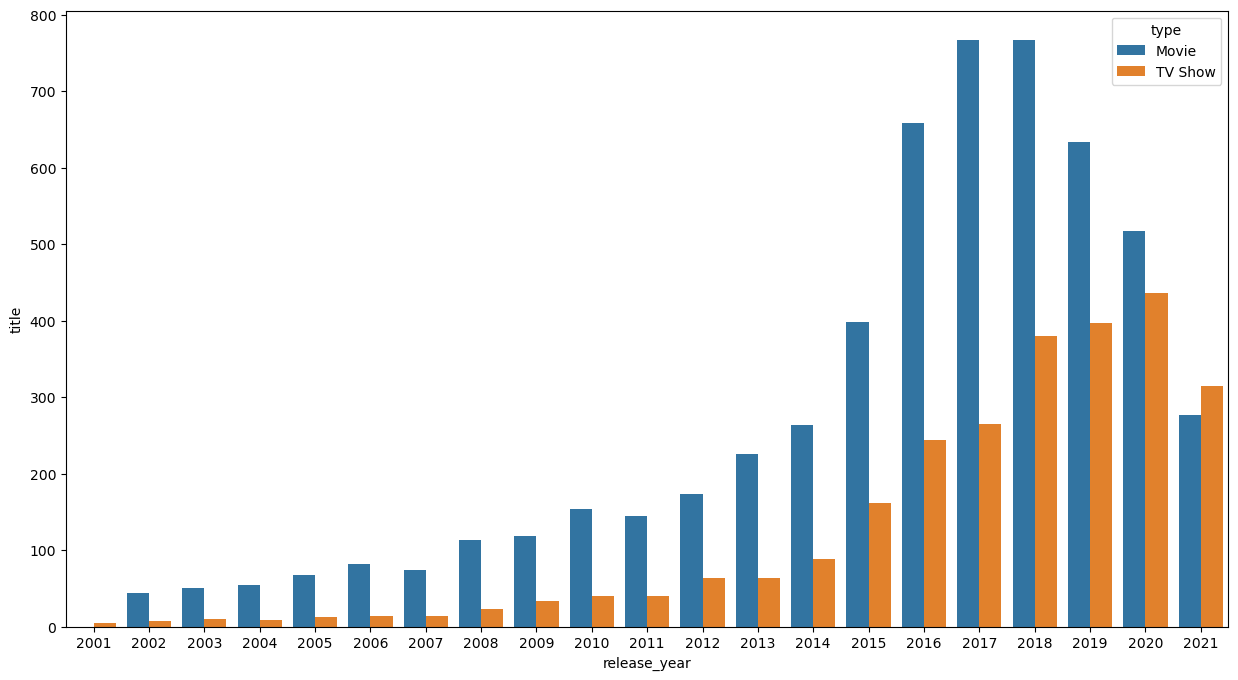

In [71]:
plt.figure(figsize=(15,8))
sns.barplot(x='release_year',y="title",data=df_retype,hue="type")
plt.show()

Last 20 years movies and release year distribution along with their release year.After 2015 tv show count increased exponentially and movies count starting itself gradually increased but after 2018 movies count decreased step by step but not tv show count decreased.

we can see that netflix give first priorities to tvshows

In [72]:
#converting string date added column to date data type
df_final1['date_added'] = pd.to_datetime(df_final1['date_added'].str.strip(), format='%B %d, %Y')

In [73]:
df_final1.head()

,title,director,cast,country,listed_in,show_id,type,date_added,release_year,rating,duration,description,duration_new
0,Dick Johnson Is Dead,Kirsten Johnson,unknown actor,United States,Documentaries,s1,Movie,2021-09-25,2020,PG-13,90,"As her father nears the end of his life, filmm...",90
1,Blood & Water,unknown director,Ama Qamata,South Africa,International TV Shows,s2,TV Show,2021-09-24,2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",0
2,Blood & Water,unknown director,Ama Qamata,South Africa,TV Dramas,s2,TV Show,2021-09-24,2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",0
3,Blood & Water,unknown director,Ama Qamata,South Africa,TV Mysteries,s2,TV Show,2021-09-24,2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",0
4,Blood & Water,unknown director,Khosi Ngema,South Africa,International TV Shows,s2,TV Show,2021-09-24,2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",0


succecfully we converted string date added column to date data type.lets start our analysis based year,month,etc

In [74]:
#seperate month from date added column
df_final1['month'] = df_final1['date_added'].dt.month
#seperate year from date added column
df_final1['year'] = df_final1['date_added'].dt.year

In [75]:
df_final1.head()

,title,director,cast,country,listed_in,show_id,type,date_added,release_year,rating,duration,description,duration_new,month,year
0,Dick Johnson Is Dead,Kirsten Johnson,unknown actor,United States,Documentaries,s1,Movie,2021-09-25,2020,PG-13,90,"As her father nears the end of his life, filmm...",90,9,2021
1,Blood & Water,unknown director,Ama Qamata,South Africa,International TV Shows,s2,TV Show,2021-09-24,2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",0,9,2021
2,Blood & Water,unknown director,Ama Qamata,South Africa,TV Dramas,s2,TV Show,2021-09-24,2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",0,9,2021
3,Blood & Water,unknown director,Ama Qamata,South Africa,TV Mysteries,s2,TV Show,2021-09-24,2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",0,9,2021
4,Blood & Water,unknown director,Khosi Ngema,South Africa,International TV Shows,s2,TV Show,2021-09-24,2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",0,9,2021


In [76]:
#number of shows added based on year
df_year = df_final1.groupby(['year']).agg({'title':'nunique'}).reset_index().sort_values(by='year',ascending=True)


In [77]:
df_year

,year,title
0,2008,2
1,2009,2
2,2010,1
3,2011,13
4,2012,3
5,2013,11
6,2014,24
7,2015,82
8,2016,432
9,2017,1189


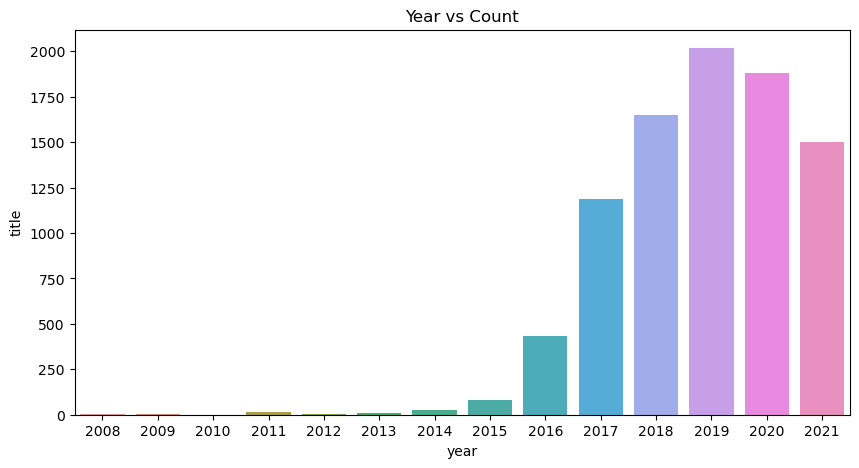

In [78]:
#plotting year wise shows added count
plt.figure(figsize=(10,5))
plt.title("Year vs Count")
sns.barplot(x = 'year',y = 'title',data = df_year )
plt.show()

added shows count exponentially increasing after 2016 and after 2019 slightly decreasing corona pandamic may be the reason

In [79]:
#number of shows added based on month
df_month = df_final1.groupby(['month']).agg({'title':'nunique'}).reset_index().sort_values(by='month',ascending=True)

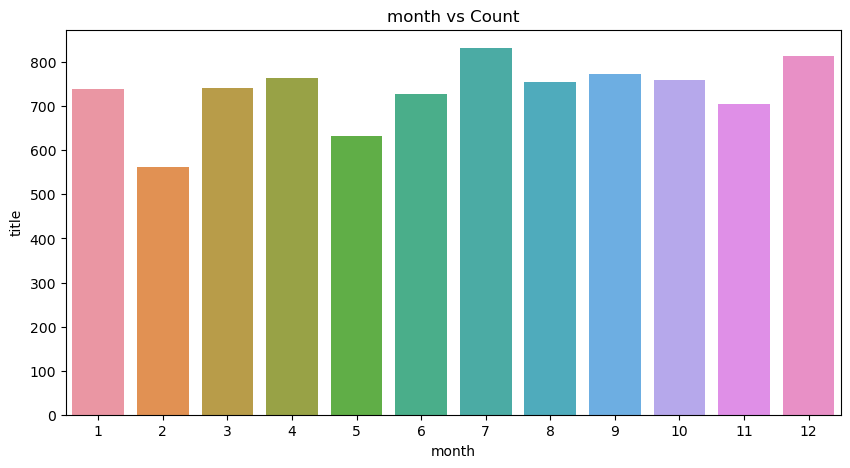

In [80]:
#plotting year wise shows added count
plt.figure(figsize=(10,5))
plt.title("month vs Count")
sns.barplot(x = 'month',y = 'title',data = df_month)
plt.show()

Augest month has highest count

In [81]:
df_final1.head()

,title,director,cast,country,listed_in,show_id,type,date_added,release_year,rating,duration,description,duration_new,month,year
0,Dick Johnson Is Dead,Kirsten Johnson,unknown actor,United States,Documentaries,s1,Movie,2021-09-25,2020,PG-13,90,"As her father nears the end of his life, filmm...",90,9,2021
1,Blood & Water,unknown director,Ama Qamata,South Africa,International TV Shows,s2,TV Show,2021-09-24,2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",0,9,2021
2,Blood & Water,unknown director,Ama Qamata,South Africa,TV Dramas,s2,TV Show,2021-09-24,2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",0,9,2021
3,Blood & Water,unknown director,Ama Qamata,South Africa,TV Mysteries,s2,TV Show,2021-09-24,2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",0,9,2021
4,Blood & Water,unknown director,Khosi Ngema,South Africa,International TV Shows,s2,TV Show,2021-09-24,2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",0,9,2021


In [82]:
#extracting directors minimum and maximum release year
df_final1.groupby(['director'])["release_year"].agg(['min',"max"])

,min,max
director,,
A. L. Vijay,2016,2019
A. Raajdheep,2020,2020
A. Salaam,1975,1975
A.R. Murugadoss,2017,2018
Aadish Keluskar,2018,2018
...,...,...
Éric Warin,2016,2016
Ísold Uggadóttir,2018,2018
Óskar Thór Axelsson,2017,2017


In [83]:
#extracting director release year minimum and maximum
df_dir = df_final1.groupby(['director'])["release_year"].agg(['min',"max"]).reset_index()
#filtering outlier because we have unknown director
df_dir = df_dir.loc[df_dir['director']!='unknown director',:]
#create a column calulating director experience 
df_dir['years_of_exp'] = df_dir['max'] - df_dir['min']
#filtering top 5 experienced directors
exp_dir = df_dir.sort_values(by='years_of_exp',ascending=False)[:5]

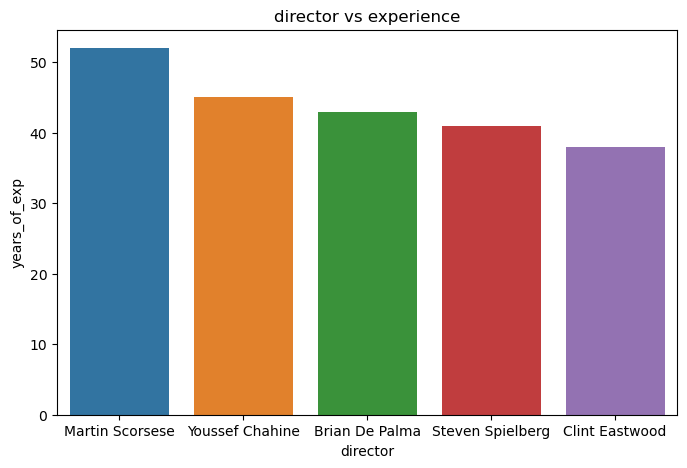

In [84]:
plt.figure(figsize=(8,5))
plt.title('director vs experience')
sns.barplot(x='director',y='years_of_exp',data = exp_dir)
plt.show()

Top 5 experienced directors

After done a lot of analysis we can see that netflix give high priority to tv shows rather than movies nowadays.
Movies ditribution is larger than tv shows.
After 2015 only netflix added exponentially shows.